In [187]:
import datetime as datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

%matplotlib inline

In [2]:
#nivel educativo
postulantes_educacion = pd.read_csv("datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv", low_memory=False)

#fecha de nacimiento y genero
postulantes_genero_y_edad = pd.read_csv("datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)

#vistas de avisos online y offline
vistas = pd.read_csv("datos/datos_navent_fiuba/fiuba_3_vistas.csv", low_memory=False)

#postulaciones hasta el 1ro de marzo 2018
postulaciones = pd.read_csv("datos/datos_navent_fiuba/fiuba_4_postulaciones.csv", low_memory=False)

#avisos online al 8 de marzo de 2018
avisos_online = pd.read_csv("datos/datos_navent_fiuba/fiuba_5_avisos_online.csv", low_memory=False)

#detalle de avisos vistos y postulados tanto offline como online
avisos_detalle = pd.read_csv("datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv", low_memory=False)

In [138]:
result = postulaciones.join(postulantes_educacion.set_index('idpostulante'), on='idpostulante')
postulantes_universitarios = result[result['nombre']=='Universitario']
postulantes_universitarios_en_Curso = postulantes_universitarios[postulantes_universitarios['estado']=='En Curso']

postulantes_universitarios_en_Curso.head()

,idaviso,idpostulante,fechapostulacion,nombre,estado
88,1112266605,8BkL,2018-01-18 09:56:10,Universitario,En Curso
89,1112283039,8BkL,2018-01-24 11:01:01,Universitario,En Curso
90,1112264774,8BkL,2018-01-24 11:06:16,Universitario,En Curso
91,1112283631,8BkL,2018-02-07 06:53:24,Universitario,En Curso
92,1112342608,8BkL,2018-02-17 17:40:55,Universitario,En Curso


In [200]:
total = postulantes_universitarios_en_Curso.join(avisos_detalle.set_index('idaviso'), on='idaviso')
total = total[['idpostulante','tipo_de_trabajo']]

total = total.dropna(subset=['tipo_de_trabajo'])

full_time = total[(total['tipo_de_trabajo']=='Full-time')]
part_time = total[(total['tipo_de_trabajo']=='Part-time')]

total.head()

,idpostulante,tipo_de_trabajo
88,8BkL,Full-time
89,8BkL,Full-time
90,8BkL,Full-time
92,8BkL,Full-time
93,8BkL,Full-time


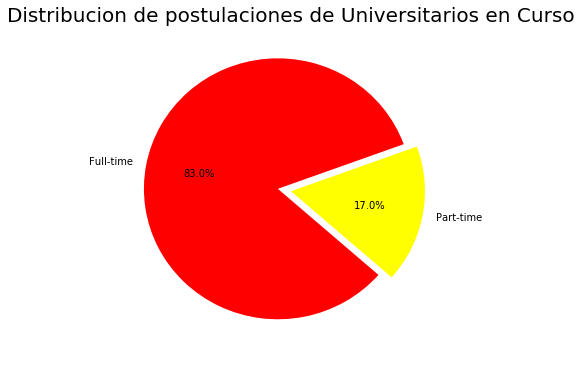

In [201]:
sizes = [full_time.tipo_de_trabajo.count(), part_time.tipo_de_trabajo.count()]
nombres = ['Full-time', 'Part-time']

plt.figure(figsize=(6, 6))
plt.title('Distribucion de postulaciones de Universitarios en Curso', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'yellow'], explode=(0.1, 0))
plt.show()